## **Loan Approval Prediction: A Classification Analysis**

Classification in machine learning is the process of categorizing input data into predefined classes or labels based on their features or characteristics.  


Applying classification to a loan dataset available on Kaggle at this link: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset. The dataset consists of 12 variables and 4269 observations, with the target variable 'LOAN_STATUS' having two possible values: 'Approved' or 'Rejected.'

Using classification algorithms for a loan approval dataset is a common practice when the goal is to predict whether a loan application will be approved or rejected based on historical data and applicant attributes. Classification algorithms are well-suited for supervised learning scenarios where you have labeled data that can be used to train and evaluate the model's performance.


For the purpose of classification, the dataset is partitioned into two distinct subsets: the training dataset and the testing dataset, with a division ratio of approximately 70% for training and 30% for testing. This division facilitates the evaluation of various classification algorithms on these segregated datasets. The aim is to assess the algorithms' performance in accurately predicting outcomes by training on one subset and then evaluating on the other. This practice provides valuable insights into the models' capabilities and their generalization to new, unseen data.

In [ ]:
# Install packages
install.packages("caret")
install.packages("glmnet")
install.packages("xgboost")


# Load xgboost package
library(xgboost)
library(glmnet)
library(caret)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following object is masked from ‘package:xgboost’:

    slice


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, sete

In [ ]:
# Read the loan dataset from the specified file path
dataLoan <- read.csv("/content/sample_data/loan_approval_dataset_original.csv")
head(dataLoan)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
6,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected


In [ ]:
# Data Preprocessing checking null  values
missing_values_count <- colSums(is.na(dataLoan))
missing_values_count

loan_id         no_of_dependents                education 
                       0                        0                        0 
           self_employed             income_annum              loan_amount 
                       0                        0                        0 
               loan_term              cibil_score residential_assets_value 
                       0                        0                        0 
 commercial_assets_value      luxury_assets_value         bank_asset_value 
                       0                        0                        0 
             loan_status 
                       0

In [ ]:
# Data Preprocessing checking duplicate values
duplicated_rows <- which(duplicated(dataLoan))
duplicated_rows

integer(0)

In [ ]:
# Mutate the 'loan_status' column to binary values (1 for 'Graduate', 0 for )
dataLoan <- dataLoan %>%
  mutate(loan_status  = ifelse(loan_status  == " Approved", 1, 0))

# Convert variables to factors
dataLoan$loan_status   <- as.factor(dataLoan$loan_status )


In [ ]:
# Mutate the 'education' column to binary values (1 for 'Graduate', 0 for )
dataLoan <- dataLoan %>%
  mutate(education  = ifelse(education  == " Graduate", 1, 0))

# Convert variables to factors
dataLoan$education   <- as.factor(dataLoan$education )


In [ ]:
# Mutate the 'self_employed' column to binary values (1 for 'Yes', 0 for )
dataLoan <- dataLoan %>%
  mutate(self_employed  = ifelse(self_employed  == " Yes", 1, 0))

# Convert variables to factors
dataLoan$self_employed   <- as.factor(dataLoan$self_employed)


In [ ]:
# Define the columns to drop
dataLoan <- dataLoan[, setdiff(names(dataLoan), 'loan_id')]

head(dataLoan)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
6,0,1,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


In [ ]:
# Display the structure of the loan dataset
str(dataLoan)

'data.frame':	4269 obs. of  12 variables:
 $ no_of_dependents        : int  2 0 3 3 5 0 5 2 0 5 ...
 $ education               : Factor w/ 2 levels "0","1": 2 1 2 2 1 2 2 2 2 1 ...
 $ self_employed           : Factor w/ 2 levels "0","1": 1 2 1 1 2 2 1 2 2 1 ...
 $ income_annum            : int  9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000 800000 1100000 ...
 $ loan_amount             : int  29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000 2200000 4300000 ...
 $ loan_term               : int  12 8 20 8 20 10 4 20 20 10 ...
 $ cibil_score             : int  778 417 506 467 382 319 678 382 782 388 ...
 $ residential_assets_value: int  2400000 2700000 7100000 18200000 12400000 6800000 22500000 13200000 1300000 3200000 ...
 $ commercial_assets_value : int  17600000 2200000 4500000 3300000 8200000 8300000 14800000 5700000 800000 1400000 ...
 $ luxury_assets_value     : int  22700000 8800000 33300000 23300000 29400000 13700000 29200000 11800000 280000

In [ ]:
# Displaying a summary of the dataset 'dataLoan' to provide an overview of its key statistics and characteristics.
summary(dataLoan)


 no_of_dependents education self_employed  income_annum      loan_amount      
 Min.   :0.000    0:2125    0:2119        Min.   : 200000   Min.   :  300000  
 1st Qu.:1.000    1:2144    1:2150        1st Qu.:2700000   1st Qu.: 7700000  
 Median :3.000                            Median :5100000   Median :14500000  
 Mean   :2.499                            Mean   :5059124   Mean   :15133450  
 3rd Qu.:4.000                            3rd Qu.:7500000   3rd Qu.:21500000  
 Max.   :5.000                            Max.   :9900000   Max.   :39500000  
   loan_term     cibil_score    residential_assets_value
 Min.   : 2.0   Min.   :300.0   Min.   : -100000        
 1st Qu.: 6.0   1st Qu.:453.0   1st Qu.: 2200000        
 Median :10.0   Median :600.0   Median : 5600000        
 Mean   :10.9   Mean   :599.9   Mean   : 7472617        
 3rd Qu.:16.0   3rd Qu.:748.0   3rd Qu.:11300000        
 Max.   :20.0   Max.   :900.0   Max.   :29100000        
 commercial_assets_value luxury_assets_value ban

# **Logistic Regrsession**

The logistic regression model was constructed using the provided formula,
incorporating attributes such as "no_of_dependents," "education," "self_employed,"
"income_annum," "loan_amount," "loan_term," "cibil_score,"
"residential_assets_value," "commercial_assets_value," "luxury_assets_value," and
"bank_asset_value." This binary classification model was applied to the training
dataset, The summary of the logistic regression model showcases various statistical
metrics, such as coefficients, p-values, and confidence intervals, providing insights
into the significance and impact of each attribute on the "loan_status" outcome. This
analysis serves to reveal the relationships between the predictors and the likelihood of
loan approval, contributing to a better understanding of the variables' influence on the
classification task.

In [ ]:
set.seed(1234)
ind <- sample(2, nrow(dataLoan), replace = T, prob = c(0.7, 0.3))
train <- dataLoan[ind==1,]
test <- dataLoan[ind==2,]

glm_formula <- loan_status ~ no_of_dependents + education + self_employed + income_annum +loan_amount + loan_term + cibil_score + residential_assets_value +commercial_assets_value + luxury_assets_value + bank_asset_value
glm_model <- glm(glm_formula, data = train, family = 'binomial')
summary(glm_model)


Call:
glm(formula = glm_formula, family = "binomial", data = train)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.128e+01  5.128e-01 -22.002  < 2e-16 ***
no_of_dependents          1.045e-02  4.157e-02   0.251    0.802    
education1                1.369e-01  1.410e-01   0.971    0.332    
self_employed1           -3.207e-03  1.405e-01  -0.023    0.982    
income_annum             -6.823e-07  1.077e-07  -6.337 2.34e-10 ***
loan_amount               1.591e-07  2.164e-08   7.351 1.97e-13 ***
loan_term                -1.583e-01  1.361e-02 -11.636  < 2e-16 ***
cibil_score               2.467e-02  9.860e-04  25.022  < 2e-16 ***
residential_assets_value  1.413e-08  1.410e-08   1.002    0.317    
commercial_assets_value   4.613e-09  2.046e-08   0.225    0.822    
luxury_assets_value       3.290e-08  2.063e-08   1.594    0.111    
bank_asset_value          6.051e-08  3.927e-08   1.541    0.123    
---
Signif. codes:  0 ‘***’ 0.00

The provided output appears to be the coefficients summary from a logistic regression model. In logistic regression, the coefficients represent the estimated change in the log-odds of the response variable for a one-unit change in the corresponding predictor variable. Here's an explanation:

The intercept ((Intercept)) is the estimated log-odds of the response variable when all predictor variables are zero.

**no_of_dependents:** The coefficient suggests the expected change in log-odds for each one-unit increase in the number of dependents, but it is not statistically significant (p-value = 0.802).

**education1:** This corresponds to a binary variable (possibly indicating a type of education), and the coefficient suggests the expected change in log-odds for a one-unit change, but it is not statistically significant (p-value = 0.332).

**self_employed1:** Similar interpretation for a binary variable indicating self-employment, but it is not statistically significant (p-value = 0.982).

**income_annum:** The negative coefficient indicates a decrease in the log-odds of the response for each one-unit increase in income (p-value < 2e-16).

**loan_amount:** A positive coefficient suggests an increase in the log-odds of the response for each one-unit increase in loan amount (p-value < 2e-16).

**loan_term:** A negative coefficient suggests a decrease in the log-odds of the response for each one-unit increase in the loan term (p-value < 2e-16).

**cibil_score:** Positive coefficient indicates an increase in log-odds for higher CIBIL scores (p-value < 2e-16).

residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value: These coefficients pertain to different types of assets, but none of them seem statistically significant (p-values > 0.05).

The null deviance and residual deviance provide information about the goodness of fit. The AIC (Akaike Information Criterion) is a measure of model performance, with lower values indicating better-fitting models.

In summary, the model appears to have several significant predictors, such as income, loan amount, loan term, and CIBIL score, while some asset-related variables are not statistically significant. The AIC value provides a measure of the model's fit.

In [ ]:
# Prediction
p_train <- predict(glm_model, train, type = 'response')


In [ ]:
# Misclassification error - train data
pred_train <- ifelse(p_train>0.5, 1, 0)
tab_train <- table(Predicted = pred_train, Actual = train$loan_status)
tab_train
1 - sum(diag(tab_train))/sum(tab_train)


         Actual
Predicted    0    1
        0 1034  124
        1  129 1723

[1] 0.08405316

In [ ]:
# Misclassification error - test data
p_test <- predict(glm_model, test, type = 'response')
pred_test <- ifelse(p_test>0.5, 1, 0)
tab_test <- table(Predicted = pred_test, Actual = test$loan_status)
tab_test
1 - sum(diag(tab_test))/sum(tab_test)

         Actual
Predicted   0   1
        0 398  55
        1  52 754

[1] 0.08498809

In [ ]:
# Calculate the confusion matrix for the test set
cm_test <- table(Predicted = pred_test, Actual = test$loan_status)

tp <- cm_test[1, 1]
fp <- cm_test[2, 1]
fn <- cm_test[1, 2]
tn <- cm_test[2, 2]

confusionMatrix(cm_test)

# Calculate overall accuracy for the test set
overall_accuracy <- sum(diag(cm_test)) / sum(cm_test)
precision <- tp / (tp + fp)
recall <- tp / (tp + fn)
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the metrics of LR
cat("Overall Accuracy:", overall_accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")


Confusion Matrix and Statistics

         Actual
Predicted   0   1
        0 398  55
        1  52 754
                                          
               Accuracy : 0.915           
                 95% CI : (0.8982, 0.9298)
    No Information Rate : 0.6426          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8153          
                                          
 Mcnemar's Test P-Value : 0.8467          
                                          
            Sensitivity : 0.8844          
            Specificity : 0.9320          
         Pos Pred Value : 0.8786          
         Neg Pred Value : 0.9355          
             Prevalence : 0.3574          
         Detection Rate : 0.3161          
   Detection Prevalence : 0.3598          
      Balanced Accuracy : 0.9082          
                                          
       'Positive' Class : 0               
                                     

Overall Accuracy: 0.9150119 
Precision: 0.8844444 
Recall: 0.8785872 
F1 Score: 0.8815061 


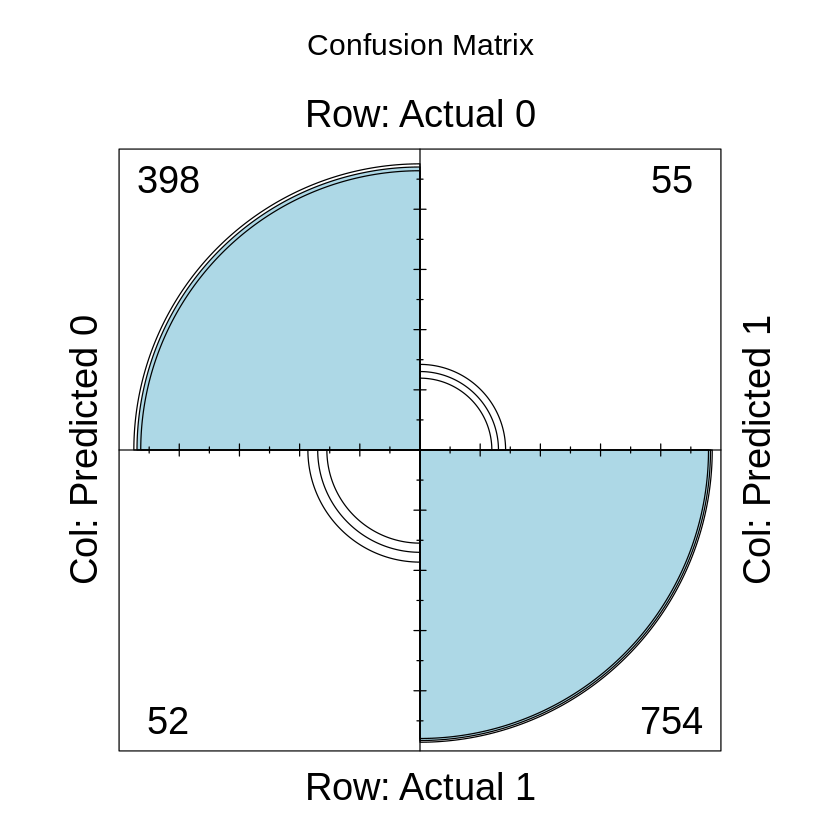

In [ ]:

# To visualize Confusion matrix data
conf_matrix <- matrix(c(398, 55, 52, 754), nrow = 2, byrow = TRUE)

# Add row and column names
rownames(conf_matrix) <- c("Actual 0", "Actual 1")
colnames(conf_matrix) <- c("Predicted 0", "Predicted 1")

# Convert the matrix into a table
conf_table <- as.table(conf_matrix)

# Visualize the confusion matrix

fourfoldplot(conf_table, color = c("white", "lightblue"), margin = 2, main = "Confusion Matrix")


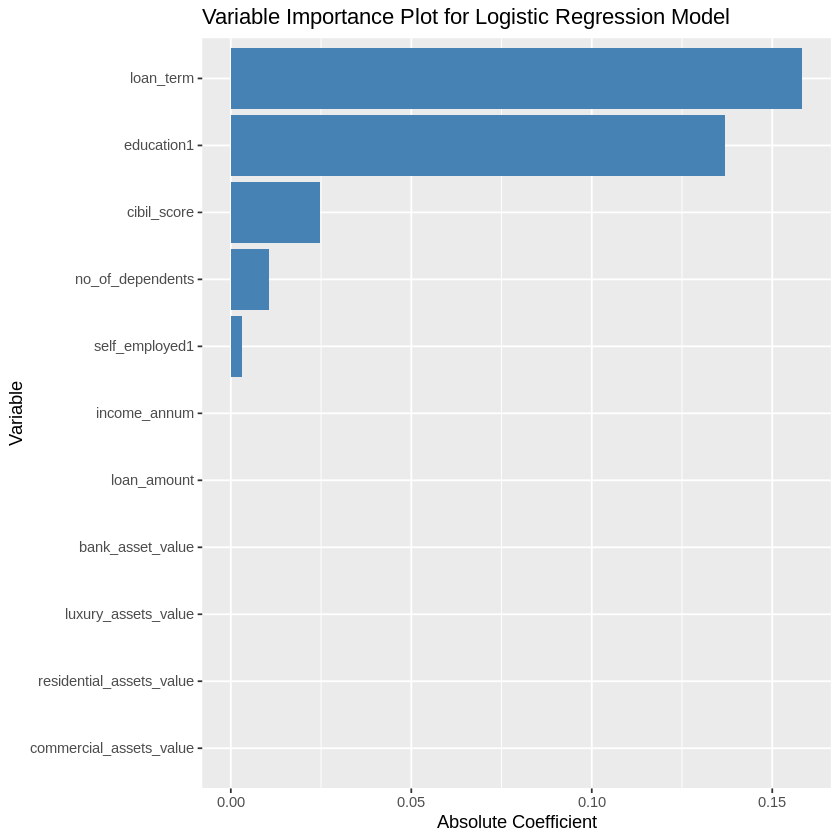

In [ ]:

# Get the variable coefficients and their names (excluding intercept)
coefficients <- coef(glm_model)[-1]
variable_names <- names(coefficients)

# Create a data frame for variable importance
variable_importance <- data.frame(variable = variable_names, coefficient = coefficients)

# Order the variables by absolute coefficient value
variable_importance <- variable_importance %>%
  arrange(desc(abs(coefficient)))

# Create the variable importance plot
ggplot(variable_importance, aes(x = reorder(variable, abs(coefficient)), y = abs(coefficient))) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(x = "Variable", y = "Absolute Coefficient") +
  ggtitle("Variable Importance Plot for Logistic Regression Model")


XGB

# **XBOOSTING**

The treme Gradient Boosting (XGBoost) algorithm is employed to construct a
predictive model for a loan approval dataset. The central objective of the XGBoost algorithm is the gradual refinement of model predictions through iterative processes.The XGBoost model is established with specific configurations, including the utilization of the "multi:softprob" objective function for handling multi-class classification scenarios and the adoption of the "mlogloss" evaluation metric to gauge the model's performance. The number of classes is determined by the distinct labels present within the training dataset.

Over the course of 1000 iterations, the model undergoes training and is evaluated on both the training and testing datasets. Notably, the "mlogloss" metric consistently decreases with each iteration, demonstrating the algorithm's adaptive nature and its progressive improvement in prediction accuracy. Specifically, the "mlogloss" value initiates at 0.4522492971 during the first iteration and demonstrates remarkable progress by reaching an impressively low value of 0.0005999501 at the 1000th iteration for the training dataset. Similarly, for the testing dataset, the "mlogloss" value starts at 0.45441884and steadily improves to 0.06237987 by the 1000th iteration as we can show below.

This trend signifies the algorithm's successful adaptation and improved prediction accuracy over the training iterations. The approach capitalizes on the power of XGBoost to create a robust predictive model, adept at effectively handling complex multi-class classification tasks.

In [ ]:
# Partition data - train (70%) & test (30%)
set.seed(1234)
ind <- sample(2, nrow(dataLoan), replace = T, prob = c(0.7, 0.3))
train <- dataLoan[ind==1,]
test <- dataLoan[ind==2,]


In [ ]:
# Re-encode labels as integers starting from 0
train$loan_status <- as.numeric(factor(train$loan_status)) - 1
test$loan_status <- as.numeric(factor(test$loan_status)) - 1

In [ ]:
# Create matrix - One-Hot Encoding for Factor variables
trainm <- sparse.model.matrix(loan_status ~ .-loan_status, data = train)
train_label <- train[,"loan_status"]
train_matrix <- xgb.DMatrix(data = as.matrix(trainm), label = train_label)



testm <- sparse.model.matrix(loan_status~.-loan_status, data = test)
test_label <- test[,"loan_status"]
test_matrix <- xgb.DMatrix(data = as.matrix(testm), label = test_label)


In [ ]:
# Parameters
nc <- length(unique(train_label))
xgb_params <- list("objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = nc)
watchlist <- list(train = train_matrix, test = test_matrix)


In [ ]:
# eXtreme Gradient Boosting Model
bst_model <- xgb.train(params = xgb_params,
                       data = train_matrix,
                       nrounds = 1000,
                       watchlist = watchlist)
bst_model

[1]	train-mlogloss:0.452249	test-mlogloss:0.454419 
[2]	train-mlogloss:0.319321	test-mlogloss:0.322603 
[3]	train-mlogloss:0.234889	test-mlogloss:0.239134 
[4]	train-mlogloss:0.175011	test-mlogloss:0.183455 
[5]	train-mlogloss:0.134855	test-mlogloss:0.144706 
[6]	train-mlogloss:0.105202	test-mlogloss:0.117989 
[7]	train-mlogloss:0.083786	test-mlogloss:0.099552 
[8]	train-mlogloss:0.066745	test-mlogloss:0.087264 
[9]	train-mlogloss:0.053673	test-mlogloss:0.075589 
[10]	train-mlogloss:0.044259	test-mlogloss:0.066784 
[11]	train-mlogloss:0.036473	test-mlogloss:0.062863 
[12]	train-mlogloss:0.030366	test-mlogloss:0.057968 
[13]	train-mlogloss:0.026345	test-mlogloss:0.054430 
[14]	train-mlogloss:0.022733	test-mlogloss:0.051977 
[15]	train-mlogloss:0.020416	test-mlogloss:0.050618 
[16]	train-mlogloss:0.018432	test-mlogloss:0.048921 
[17]	train-mlogloss:0.016094	test-mlogloss:0.047043 
[18]	train-mlogloss:0.014839	test-mlogloss:0.046599 
[19]	train-mlogloss:0.013476	test-mlogloss:0.046600 
[2

##### xgb.Booster
raw: 1.7 Mb 
call:
  xgb.train(params = xgb_params, data = train_matrix, nrounds = 1000, 
    watchlist = watchlist)
params (as set within xgb.train):
  objective = "multi:softprob", eval_metric = "mlogloss", num_class = "2", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 12 
niter: 1000
nfeatures : 12 
evaluation_log:
     iter train_mlogloss test_mlogloss
    <num>          <num>         <num>
        1   0.4522492971    0.45441884
        2   0.3193209023    0.32260273
---                                   
      999   0.0006000159    0.06238613
     1000   0.0005999501    0.06237987

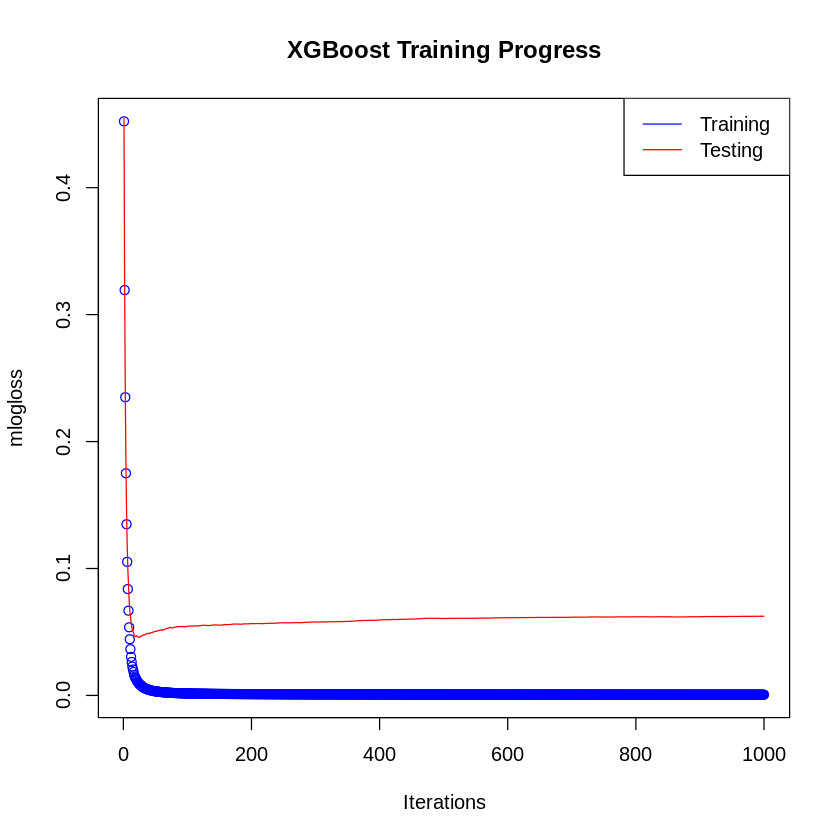

In [ ]:
# mlogloss visualiztion
e <- data.frame(bst_model$evaluation_log)
plot(e$iter, e$train_mlogloss, col = 'blue', xlab = 'Iterations', ylab = 'mlogloss', main = 'XGBoost Training Progress')
lines(e$iter, e$test_mlogloss, col = 'red', type = 'l')
legend('topright', legend = c('Training', 'Testing'), col = c('blue', 'red'), lty = 1)

In [ ]:
# Prediction & confusion matrix - test data
p <- predict(bst_model, newdata = test_matrix)
pred <- matrix(p, nrow = nc, ncol = length(p)/nc) %>%
  t() %>%
  data.frame() %>%
  mutate(label = test_label, max_prob = max.col(., "last")-1)
table(Prediction = pred$max_prob, Actual = pred$label)

          Actual
Prediction   0   1
         0 434   7
         1  16 802

In [ ]:
# Create confusion matrix
cm <- table(Prediction = pred$max_prob, Actual = pred$label)

# Calculate true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN)
tp <- cm[1, 1]
fp <- cm[2, 1]
fn <- cm[1, 2]
tn <- cm[2, 2]

# Calculate accuracy
accuracy <- sum(diag(cm)) / sum(cm)

# Calculate precision
precision <- tp / (tp + fp)

# Calculate recall (sensitivity or true positive rate)
recall <- tp / (tp + fn)

# Calculate F1 score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the metrics of XBoosting
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.9817315 
Precision: 0.9644444 
Recall: 0.984127 
F1 Score: 0.9741863 


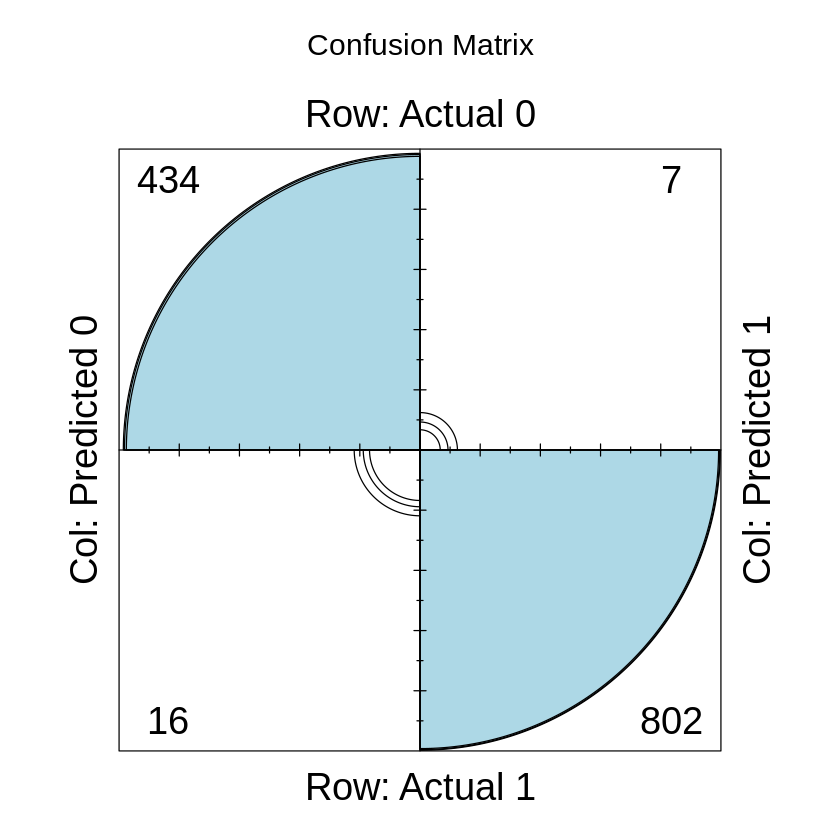

In [ ]:
# To visualize Confusion matrix data
conf_matrix <- matrix(c(434, 7, 16, 802), nrow = 2, byrow = TRUE)


# Add row and column names
rownames(conf_matrix) <- c("Actual 0", "Actual 1")
colnames(conf_matrix) <- c("Predicted 0", "Predicted 1")

# Convert the matrix into a table
conf_table <- as.table(conf_matrix)

# Visualize the confusion matrix

fourfoldplot(conf_table, color = c("white", "lightblue"), margin = 2, main = "Confusion Matrix")

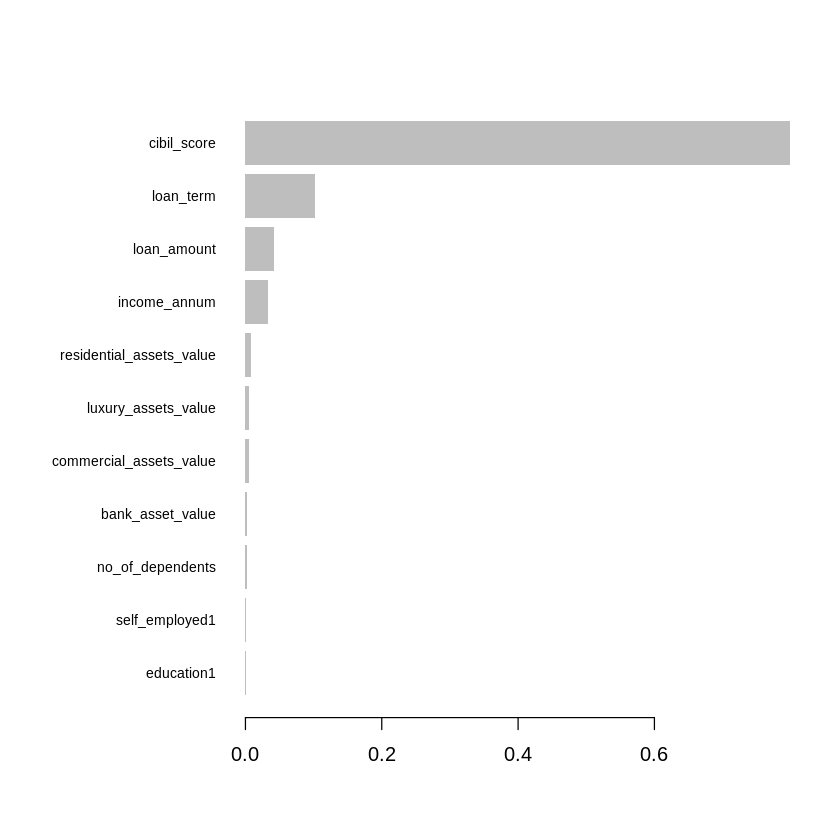

In [ ]:
# Feature importance
imp <- xgb.importance(colnames(train_matrix), model = bst_model)
xgb.plot.importance(imp)


**Comparative Analysis of Logistic Regression and XGBoost Models for Loan Approval Prediction**


The results suggest that both logistic regression and XGBoost models perform well, but there are differences in their performance metrics. Let's compare the two models:

**Logistic Regression:**

Accuracy: 91.5%
Precision: 88.44%
Recall (Sensitivity): 87.86%
F1 Score: 88.15%


**XGBoost:**

Accuracy: 98.17%
Precision: 96.44%
Recall: 98.41%
F1 Score: 97.42%
Comparison:

The XGBoost model outperforms logistic regression in terms of accuracy, precision, recall, and F1 score.
XGBoost has higher accuracy (98.17%) compared to logistic regression (91.5%).
The precision of XGBoost (96.44%) is also higher than logistic regression (88.44%).


The recall of XGBoost (98.41%) is substantially higher than logistic regression (87.86%).
The F1 score for XGBoost (97.42%) indicates a good balance between precision and recall, outperforming logistic regression (88.15%).
Conclusion:

XGBoost seems to be a more effective model for this specific prediction task, providing higher accuracy and better balance between precision and recall. It demonstrates superior performance in correctly identifying both positive and negative instances.
However, it's essential to consider the specific requirements of your application and potential trade-offs between precision and recall based on the context of the problem.